In [253]:
"""
File: Own_Mean_shift.ipymb
Author Petri Lamminaho 
Simple Mean Shift algorith from zero 
"""

'\nFile: Own_Mean_shift.ipymb\nAuthor Petri Lamminaho \nSimple Mean Shift algorith from scrat\n'

In [254]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import random
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [255]:
X = np.array([[1, 2],
              [2, 3],
              [2, 1 ],
              
              [8, 7],
              [7, 8],
              [8,9],
              
              [7,2],
              [8,2],
              [7,1],
              
              [1,8],
              [2,9],
              [2,8]            
             ])

def colors(n):
  ret = []
  for i in range(n):
    ret.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
  return ret


In [256]:
STOP_THRESHOLD = 1e-4
CLUSTER_THRESHOLD = 1e-1

In [257]:
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)

In [258]:
def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))


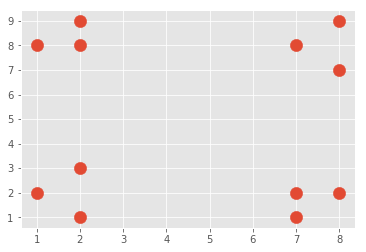

In [259]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [260]:
class Mean_Shift:
    def __init__(self, kernel=gaussian_kernel):
        self.kernel = kernel
    
    def fit(self, points, bandwidth=0.5):
        shift_points = np.array(points)
        shifting = [True] * points.shape[0]
        print(shifting)
        while True:
            max_dist = 0
            for i in range(0, len(shift_points)):
                if not shifting[i]:
                    continue
                p_shift_init = shift_points[i].copy()
                shift_points[i] = self._shift_point(shift_points[i], points, bandwidth)
                dist = distance(shift_points[i], p_shift_init)
                max_dist = max(max_dist, dist)
                shifting[i] = dist > STOP_THRESHOLD

            if(max_dist < STOP_THRESHOLD):
                break
        cluster_ids = self._cluster_points(shift_points.tolist())
        return shift_points, cluster_ids
        
    def _shift_point(self, point, points, bandwidth):
        shift_x = 0.0
        shift_y = 0.0
        scale = 0.0
        for p in points:
            dist = distance(point, p)
            weight = self.kernel(dist, bandwidth)
            shift_x += p[0] * weight
            shift_y += p[1] * weight
            scale += weight
        shift_x = shift_x / scale
        shift_y = shift_y / scale
        return [shift_x, shift_y]
        
    def _cluster_points(self, points):
        cluster_ids = []
        cluster_idx = 0
        cluster_centers = []

        for i, point in enumerate(points):
            if(len(cluster_ids) == 0):
                cluster_ids.append(cluster_idx)
                cluster_centers.append(point)
                cluster_idx += 1
            else:
                for center in cluster_centers:
                    dist = distance(point, center)
                    if(dist < CLUSTER_THRESHOLD):
                        cluster_ids.append(cluster_centers.index(center))
                if(len(cluster_ids) < i + 1):
                    cluster_ids.append(cluster_idx)
                    cluster_centers.append(point)
                    cluster_idx += 1
        return cluster_ids

[True, True, True, True, True, True, True, True, True, True, True, True]


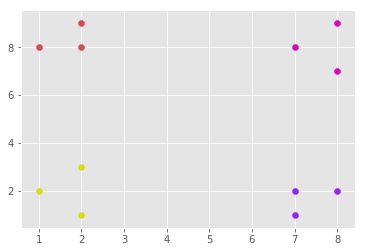

In [261]:
mean_shifter = Mean_Shift()
_, mean_shift_result = mean_shifter.fit(X, bandwidth=0.5)
color = colors(np.unique(mean_shift_result).size)

for i in range(len(mean_shift_result)):
    plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
    
plt.show()

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


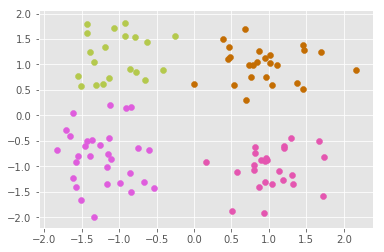

In [262]:
centers = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
X, _ = make_blobs(n_samples=100, centers=centers, cluster_std=0.4)

mean_shifter = Mean_Shift()
_, mean_shift_result = mean_shifter.fit(X, bandwidth=0.5)
color = colors(np.unique(mean_shift_result).size)

for i in range(len(mean_shift_result)):
    plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
    
plt.show()

In [263]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

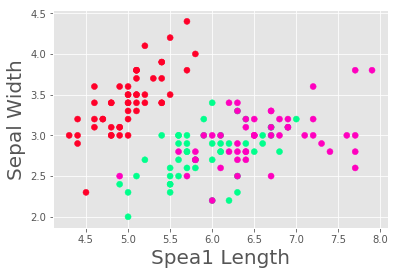

In [264]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=20)
plt.ylabel('Sepal Width', fontsize=20)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


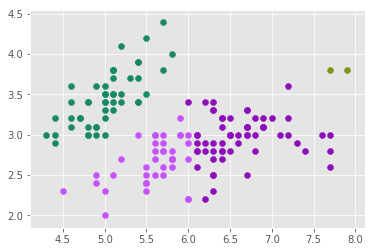

In [265]:
mean_shifter = Mean_Shift()
_, mean_shift_result = mean_shifter.fit(X, bandwidth=0.2)
color = colors(np.unique(mean_shift_result).size)

for i in range(len(mean_shift_result)):
    plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
    
plt.show()